In [1]:
from greedy_solver import GreedyFJSSPWSolver
from instances.load_benchmarks import load_fjssp_w
import evaluation

In [2]:
example_filter = {
    'n_operations': (50, 100),
    'duration_variety': (0.01, 0.02),
    'flexibility': (0.0, 0.5),
    'n_jobs': (5, 10)
}

In [3]:
instances = load_fjssp_w(example_filter)

In [4]:
results = dict()
results['greedy'] = dict()
for solver in results:
    for instance in instances:
        encoding = instances[instance]
        greedy_solver = GreedyFJSSPWSolver(encoding.durations(), encoding.job_sequence())
        sequence, machines, worker = greedy_solver.solve()
        start_times, machines, workers = evaluation.translate(sequence, machines, worker, encoding.durations())
        c = evaluation.makespan(start_times, machines, workers, encoding.durations())
        results[solver][instance] = c

In [6]:
import visualization

In [8]:
import csv
def get_best(instances):
    result = dict()
    with open('instances/InstanceData/FJSSP-W/best_known.csv', 'r') as f:
        csv_data = csv.DictReader(f, delimiter=';',  fieldnames=['name', 'fitness'])
        for data in csv_data:
            name = data['name'].split('_')[1]
            if name in instances:
                result[name] = float(data['fitness'])
    return result
known_best = get_best(list(instances.keys()))
results['known_best'] = known_best

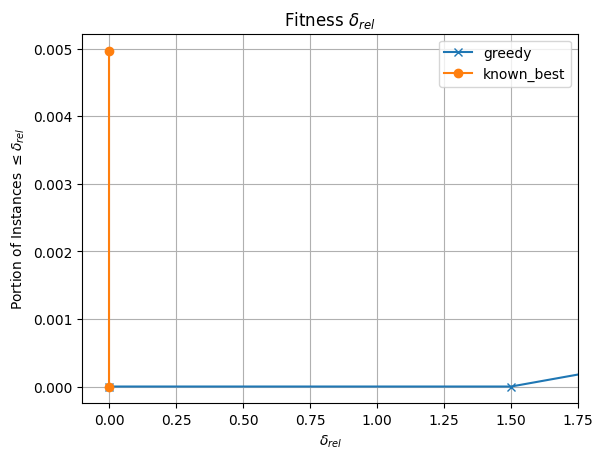

In [ ]:
visualization.visualize_gaps(results)